**Evaluation Project 5**

**Census Income Project**

**Problem Statement:**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

**The prediction task is to determine whether a person makes over $50K a year.**

**Description of fnlwgt (final weight)**
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

We use **3 sets of controls.** These are:

* A single cell estimate of the population 16+ for each state.

* Controls for Hispanic Origin by age and sex.

* Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


To download the dataset, use the link given below. 


**Downlaod Files:**

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
print("Number of rows in the dataset: ",df.shape[0])
print("Number of columns in the dataset: ",df.shape[1])

Number of rows in the dataset:  32560
Number of columns in the dataset:  15


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing values in the given dataset. Great to go ahead.Lets check if any duplicate observations present in the dataset

In [6]:
df.duplicated().sum()

24

**Deleting duplicate data in the given dataset**

In [3]:
df.drop_duplicates(inplace=True)

**After removing the duplicates,the dataset now contains 32536 rows and 15 columns**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


* By seeing mean and std dev values of Fnlwgt, Capital_gain and capital_loss, it is clear that **some abnormality exist in the dataset**

* **Minimum age is 17 and maximum age is 90**

* 75% of the population is below 48 years of age

* Lot of zero values in the capital_gain and capital_loss column. It suggests Abnormality exist in both the columns.

* The average working hours per week is 40 hours.

* Outliers exists in the dataset

In [4]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

**By looking in the csv file, we saw lot of ' ?' in the whole data and found 1836 exist in Workclass,1843 exist in Occupation and 582 exist in Native_country**

In [5]:
# Replacing ? into NaN values

df = df.replace(' ?',np.NaN)

In [10]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [11]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

**'Workclass' , 'Occupation' and 'Native_country' is categorical in nature and hence imputing the missing values with most frequent values in those columns.**

In [6]:
# Imputating Missing value with mode for categorical features
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Native_country'] = df['Native_country'].fillna(df['Native_country'].mode()[0])

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**No missing values now, cleaned data for data analysis**

**Data Analysis**

In [15]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [14]:
# Separating categorical columns
catg = ['Workclass','Education', 'Marital_status', 'Occupation', 'Relationship',
        'Race', 'Sex','Native_country', 'Income']    

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

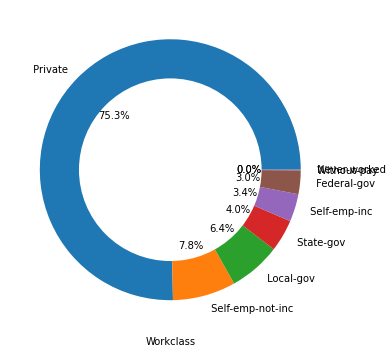

<Figure size 432x288 with 0 Axes>

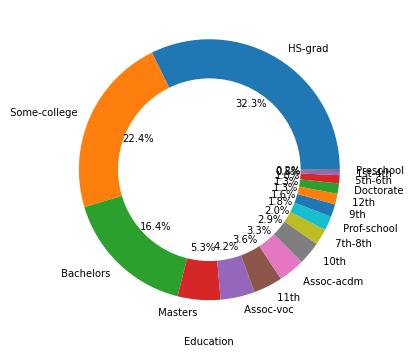

<Figure size 432x288 with 0 Axes>

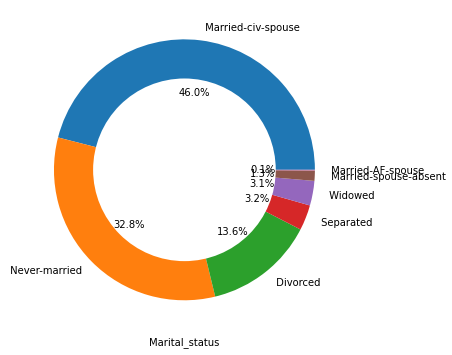

<Figure size 432x288 with 0 Axes>

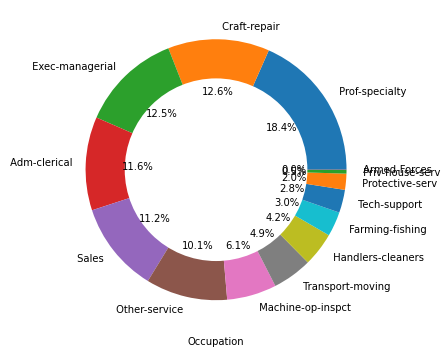

<Figure size 432x288 with 0 Axes>

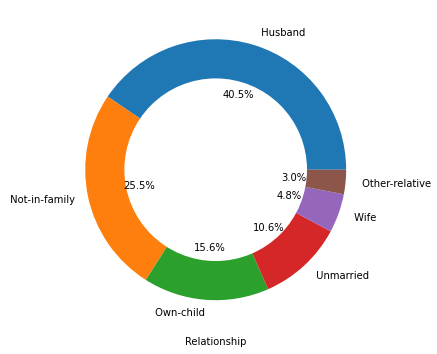

<Figure size 432x288 with 0 Axes>

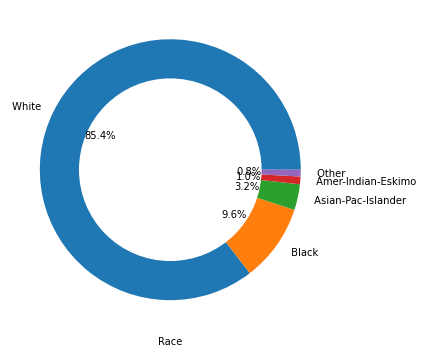

<Figure size 432x288 with 0 Axes>

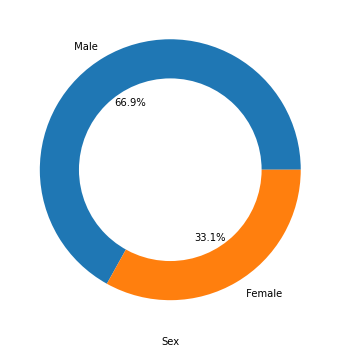

<Figure size 432x288 with 0 Axes>

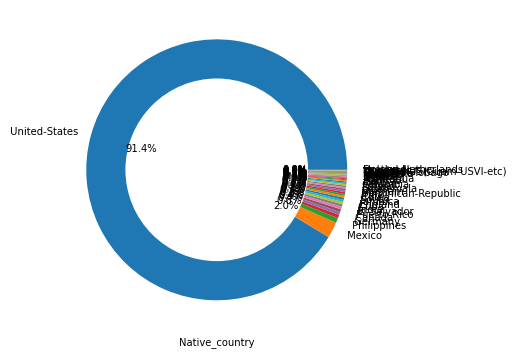

<Figure size 432x288 with 0 Axes>

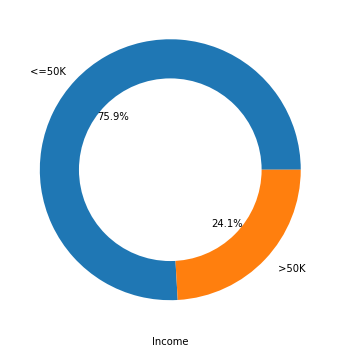

<Figure size 432x288 with 0 Axes>

In [18]:
for i in catg:
    plt.figure(figsize=(10,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

* **More than 75% of the population works in a Private company**

* Most of the population has completed either Bachelors or high school graduated

* More than 68% of the population are married and 32% never married.

* 25% of population are single and have no family.

* More than 85% of population are white in color and only 10% are black colored.

* 67% are male population and 33% are female population.

* More than 90% working professionals are US citizens

* 76% have income less than $50k per year. This clearly  shows that the target variable is an imbalnced data.

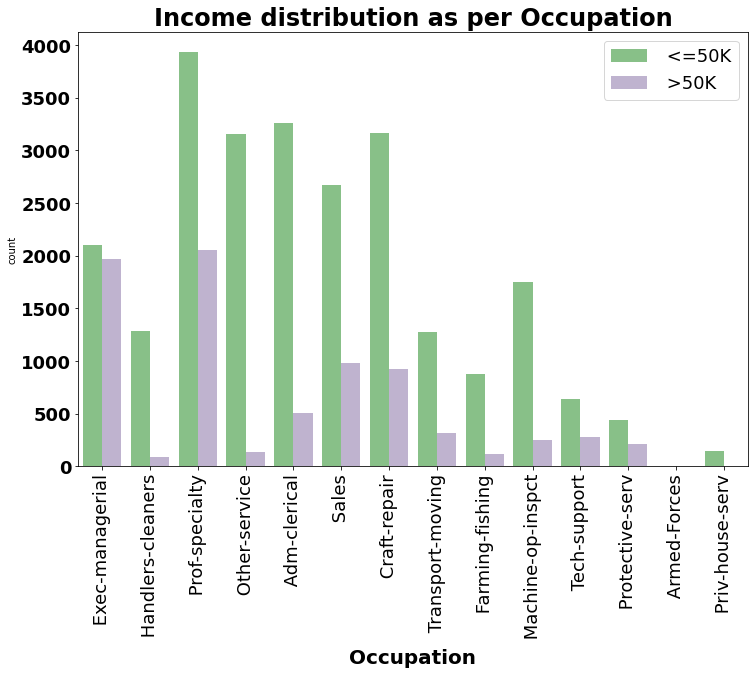

In [19]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Occupation'], hue=df['Income'], palette='Accent')
plt.title('Income distribution as per Occupation', fontsize=24, fontweight='bold')
p.set_xlabel('Occupation',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=18,rotation=90)
plt.yticks(fontsize=18,fontweight ='bold')
plt.legend(fontsize=18)
plt.show()

* Exec-managerial role are equally likely to earn more than 50K dollars an year.

* Peoples working in Arm- Forces,Priv-house-serv, Farming-fishing, Protective-serv, Other-service, Handlers-cleaners are very less likely to earn more than 50K dollars an year.

* Around 25% of the people working in Sales earn more than 50K dollars an year.

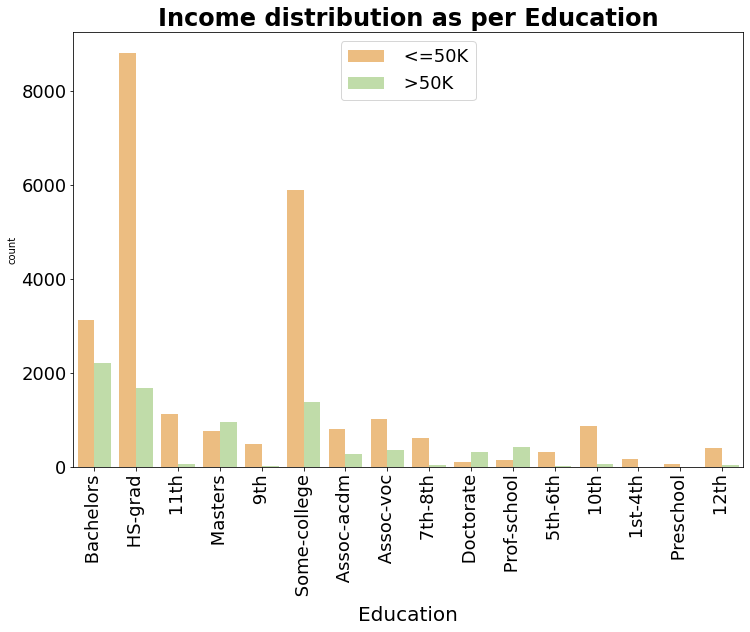

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Education'], hue=df['Income'], palette='Spectral')
plt.title('Income distribution as per Education', fontsize=24, fontweight='bold')
p.set_xlabel('Education',fontsize=20)
plt.xticks(fontsize=18,rotation=90)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()

* **Bachelors,HS-grad,Some-college and Masters are ahead in earning more than $50k in a year**

* There are very handful people who earn more than 50 K dollars having **education below 12th level**

* Other Educational qualifications earn much less in a year

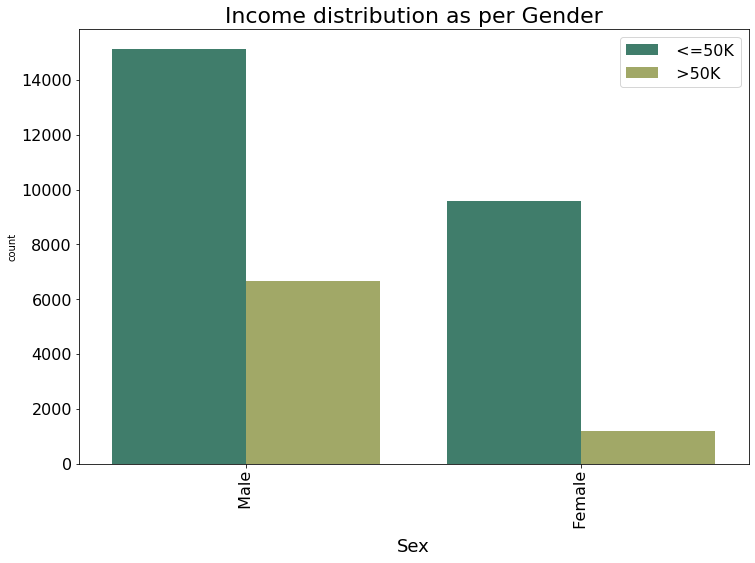

In [20]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Sex'], hue=df['Income'], palette='gist_earth')
plt.title('Income distribution as per Gender', fontsize=22)
p.set_xlabel('Sex',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

* Out of total population 75% are male (seen earlier in pie chart) and among these **nearly 30% male earn more than 50k dollars in a year**

* Nearly **10% female out of 25% population** earnmore than 50k dollars in a year 

Text(0, 0.5, 'Income')

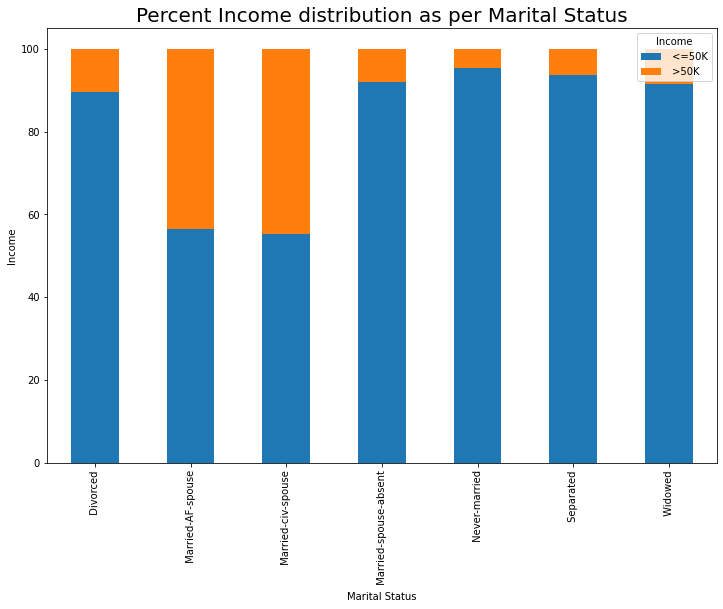

In [22]:
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=20)
plt.xlabel('Marital Status')
plt.ylabel('Income')

**Married people are most like to earn more than 50K dollars an year**

Reason Might be Emotional support and stability of life than who are divorced/separated.

In [15]:
# Seperating numerical variables

num = ['Age', 'Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']

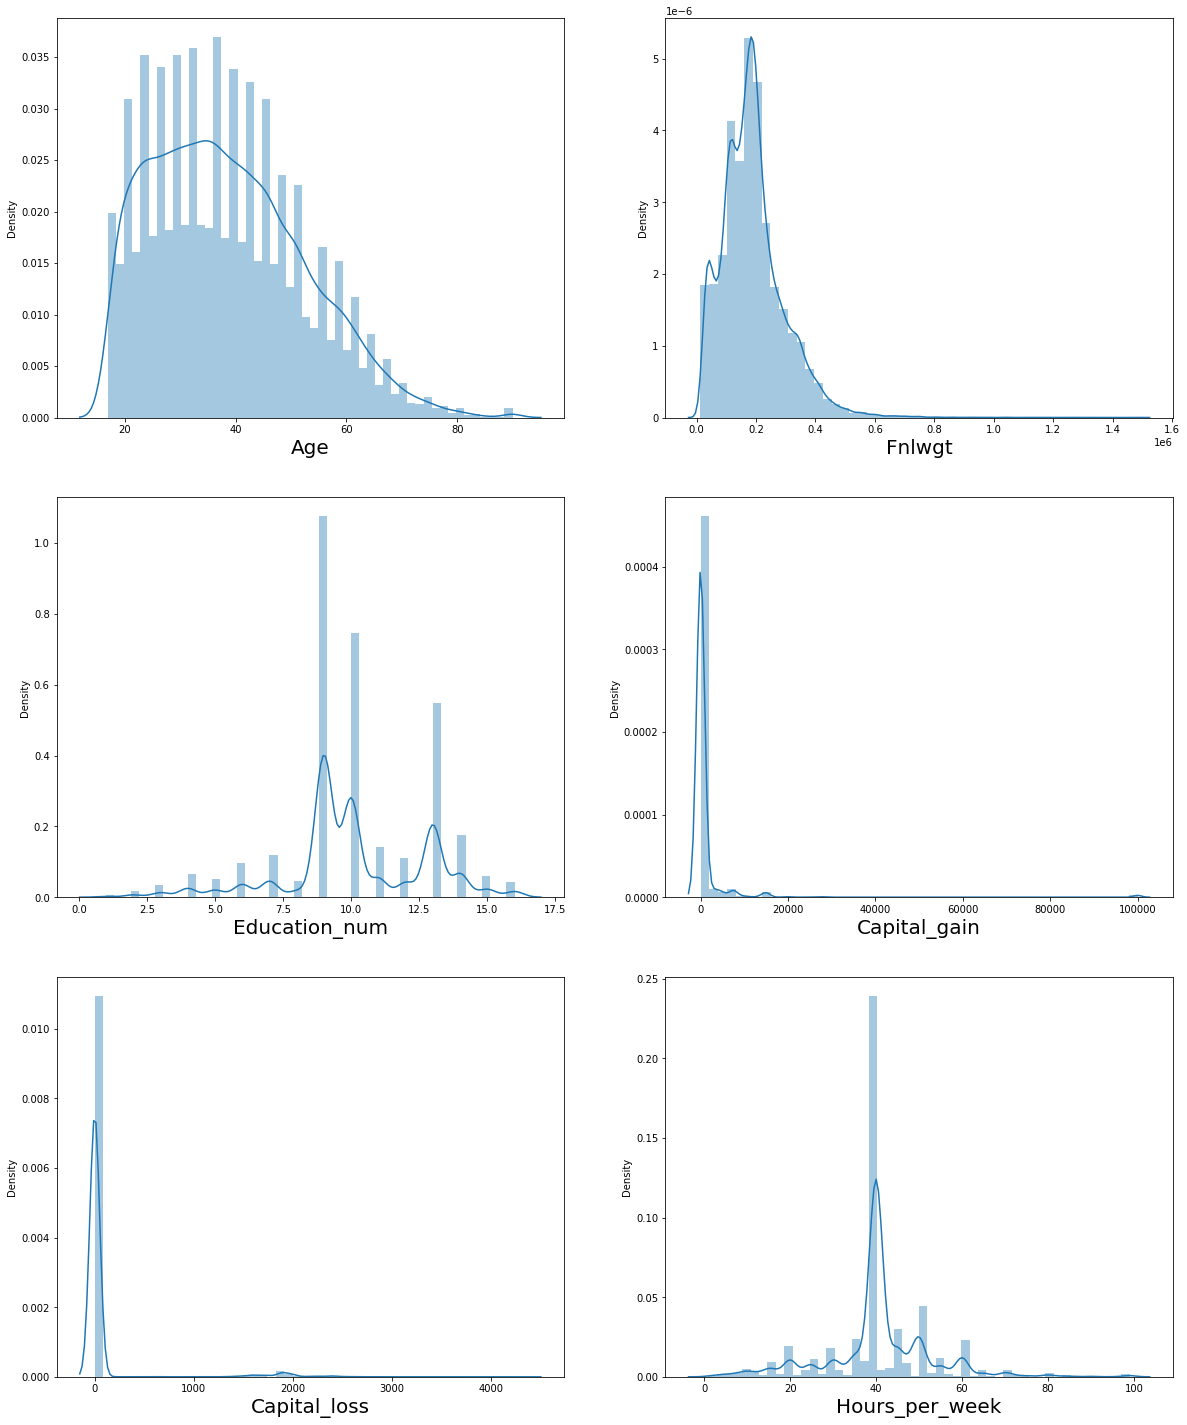

In [24]:
# Lets see how data is distributed for each column. Machine learnong model is built on the assumption that data is
#distributed normally.

plt.figure(figsize=(20,25),facecolor='w')
plotnumber=1

for column in num:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Data distribution of continuous variable is strongly skewed**

Lets check the skewness present in the data

In [25]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

**Skewness permissible limit is +/- 0.5**

Variables having skewness more than permissible limit:

  * Age
  
  * Fnlwgt

  * Capital_gain

  * Capital_loss

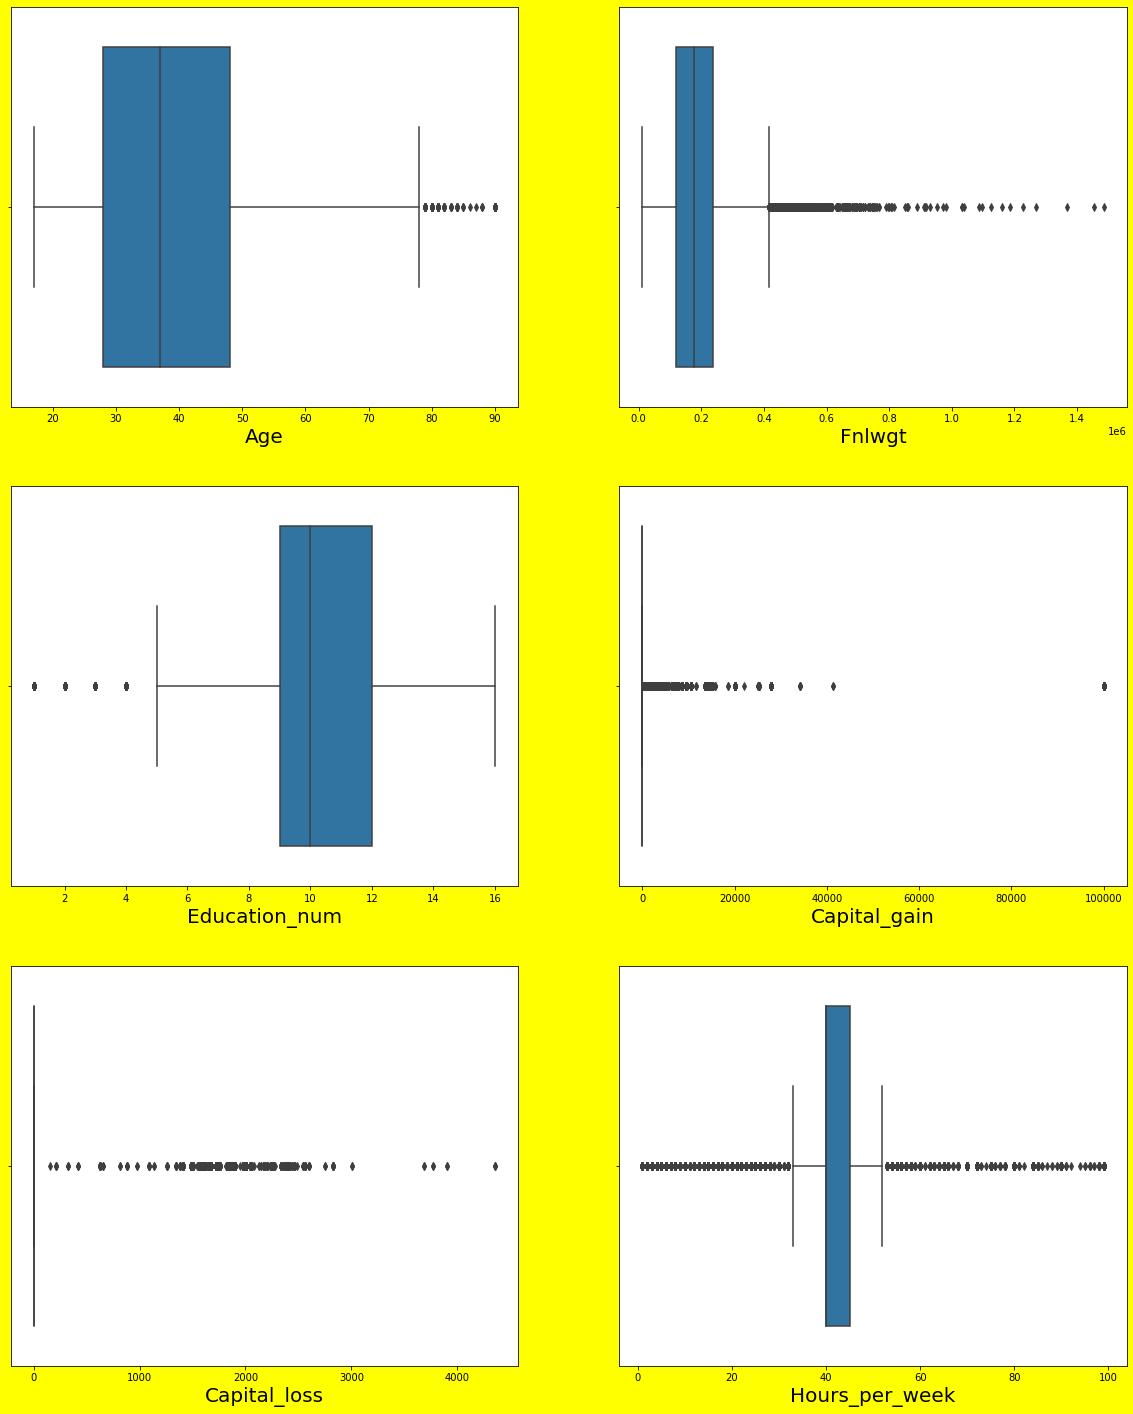

In [26]:
# Lets see the outliers present in the data using boxplot

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in num:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Presence of outliers can be seen clearly from the above plots**

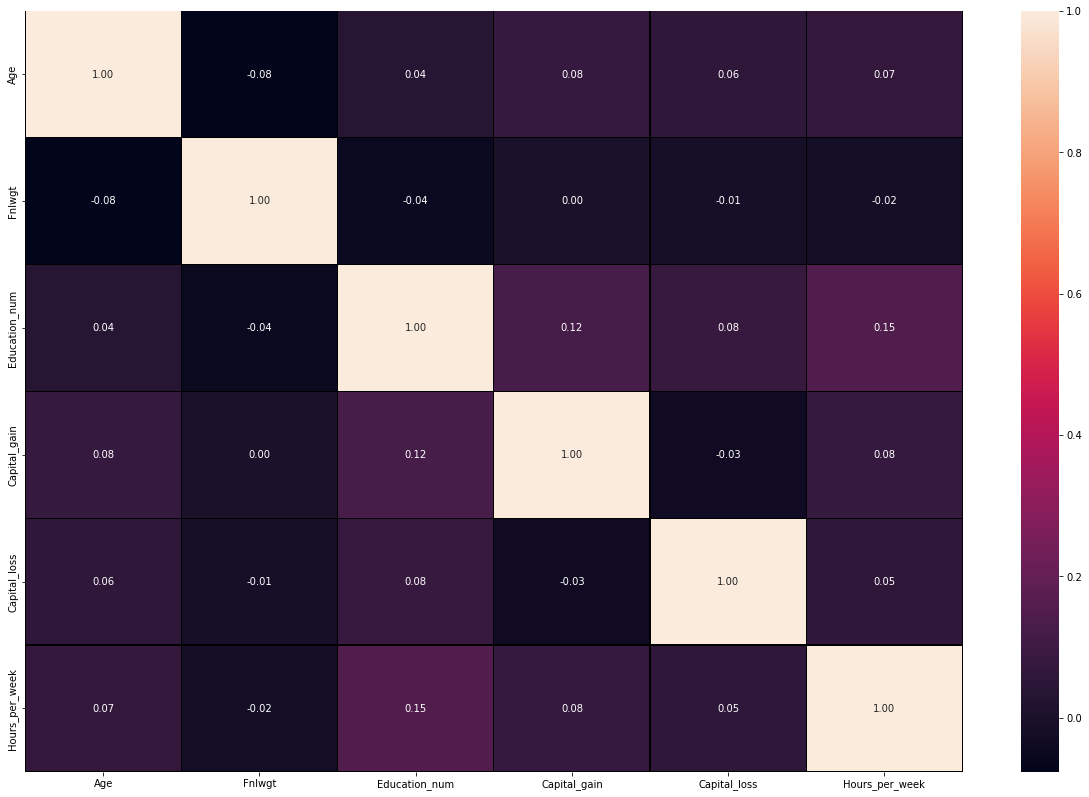

In [27]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(21,14))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

**Encoding the categorical variables**

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [10]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


**Outlier Removal**

In [12]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df_new = df[filtering_entry]

In [20]:
df_new.shape

(27751, 15)

In [21]:
print("Data loss in % : ",(32536-27751)/32536*100)

Data loss in % :  14.706786328989427


**Skewness Reduction**

In [13]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [14]:
# Seperating features and target variable for classification task

X = df_new.drop('Income',axis=1)

y = df_new['Income']

In [15]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

Capital_loss      24.774117
Capital_gain       3.067924
Native_country     1.803667
Workclass          0.221025
Relationship       0.109747
Hours_per_week     0.105757
Education_num      0.026765
Age               -0.018113
Fnlwgt            -0.034345
Marital_status    -0.128290
Occupation        -0.235667
Education         -0.313533
Sex               -0.688876
Race              -2.524407
dtype: float64

* **Native_country,Race** are skewed but as they are categorical variable,concept of skewness is irrelevant to it.

* **Capital_gain and Capital_loss** are numeric variable with lot of zero and high number. So skewness will exist in them. There is no point in transforming it because at end data will be skewed.

**Checking Multicollinearity using variance inflation factor**

In [39]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.275838,Age
1,1.010028,Workclass
2,1.024463,Fnlwgt
3,1.080141,Education
4,1.145521,Education_num
5,1.181835,Marital_status
6,1.016432,Occupation
7,1.940264,Relationship
8,1.049376,Race
9,1.648329,Sex


**Multicollinearity does not exist in the given database.Good to proceed further**

**Balancing Target Variable using SMOTE**

In [16]:
df_new['Income'].value_counts()

0    21527
1     6224
Name: Income, dtype: int64

In [17]:
print("The number of target classes before fit{}".format(Counter(y)))

The number of target classes before fitCounter({0: 21527, 1: 6224})


**0 - <=50K**

**1 - >=50K**

**Almost 76% of population earns <= 50 K dollars in a year**

Data is imbalanced.

In [18]:
from imblearn.over_sampling import SMOTE

over_smp = SMOTE(0.8)

X,y = over_smp.fit_resample(X,y)

print("The number of target classes after fit{}".format(Counter(y)))

The number of target classes after fitCounter({0: 21527, 1: 17221})


**Scaling using Standard Scaler**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

In [20]:
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.924993,1.761340,-1.126713,-0.489520,1.229593,-0.384828,-0.698677,-1.107564,0.348145,0.713231,-0.297182,-0.040301,-2.216717,0.159988
1,0.128308,-0.087835,0.412986,0.077963,-0.463100,-1.760884,-0.168882,0.106450,0.348145,0.713231,-0.297182,-0.040301,-0.040147,0.159988
2,1.099863,-0.087835,0.593302,-2.073381,-1.261090,-0.384828,-0.168882,-1.107564,-2.875664,0.713231,-0.297182,-0.040301,-0.040147,0.159988
3,0.053226,-0.087835,1.035679,0.382885,1.669909,-0.384828,-0.698677,1.549656,0.348145,-1.402070,-0.297182,-0.040301,-0.040147,0.159988
4,0.864835,-0.087835,-0.157082,-1.225409,-2.018654,0.269645,0.307890,0.106450,-2.875664,-1.402070,-0.297182,-0.040301,-2.012771,-4.443319


**Machine Learning Model Building - Classification Task**

In [21]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV


**Defining Function for calculating Model Performance**

In [22]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("Confusion Matrix \n",matrix)
        
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

**Finding the Best Random State**

In [23]:
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
  
    lr = LogisticRegression()
    
    lr.fit(X_train,y_train)    # Training the model
   
    pred_lr = lr.predict(X_test)    # Predicting the target variable
 
    acc_lr = accuracy_score(y_test,pred_lr)
  
    if acc_lr>maxAccu:
    
        maxAccu = acc_lr
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)


Maximum Accuracy: 0.7889032258064516 at random state  896


**Train Test Split using best random state**

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=896)

**Logistic Regression**

In [25]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_scaler,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 77.18%
-----------------Test Result--------------------
Confusion Matrix 
 [[3522  773]
 [ 863 2592]]
Accuracy Score : 78.89%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.80      0.82      0.81      4295
           1       0.77      0.75      0.76      3455

    accuracy                           0.79      7750
   macro avg       0.79      0.79      0.79      7750
weighted avg       0.79      0.79      0.79      7750

Cross validation score of Logistic regression model : 77.42077720746485


**Tuning parameters for Logistic Regression**

In [37]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}


In [38]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_scaler,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 77.30%
-----------------Test Result--------------------
Confusion Matrix 
 [[3499  786]
 [ 849 2616]]
Accuracy Score : 78.90%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.80      0.82      0.81      4285
           1       0.77      0.75      0.76      3465

    accuracy                           0.79      7750
   macro avg       0.79      0.79      0.79      7750
weighted avg       0.79      0.79      0.79      7750

Cross validation score of Logistic regression model : 77.60918395297624


**KNN Classifier**

In [26]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_scaler,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 89.03%
-----------------Test Result--------------------
Confusion Matrix 
 [[3460  835]
 [ 307 3148]]
Accuracy Score : 85.26%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.92      0.81      0.86      4295
           1       0.79      0.91      0.85      3455

    accuracy                           0.85      7750
   macro avg       0.85      0.86      0.85      7750
weighted avg       0.86      0.85      0.85      7750

Cross validation score of K Neighbors Classifier model : 84.73733618073508


**Tuning parameters for KNN Classifier**

In [40]:
knn_params = { 'n_neighbors':[4,5],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','brute'],
    'leaf_size':[25,30]}

grd_knn = GridSearchCV(knn,param_grid = knn_params, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}


In [41]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_scaler,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[3520  765]
 [ 223 3242]]
Accuracy Score : 87.25%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.94      0.82      0.88      4285
           1       0.81      0.94      0.87      3465

    accuracy                           0.87      7750
   macro avg       0.87      0.88      0.87      7750
weighted avg       0.88      0.87      0.87      7750

Cross validation score of K Neighbors Classifier model : 87.38005170282118


**Decision Tree Classifier**

In [27]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_scaler,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[3693  602]
 [ 595 2860]]
Accuracy Score : 84.55%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.86      0.86      0.86      4295
           1       0.83      0.83      0.83      3455

    accuracy                           0.85      7750
   macro avg       0.84      0.84      0.84      7750
weighted avg       0.85      0.85      0.85      7750

Cross validation score of Decision Tree Classifier model : 83.92193856439333


**Tuning parameters for Decision Tree**

In [43]:
grid_param = {'max_depth': range(15,20),
              'min_samples_leaf': range(8,14),
              'min_samples_split': range(2,6),
              'max_leaf_nodes': range(40,50)
             }

grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'max_depth': 15, 'max_leaf_nodes': 43, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [44]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_scaler,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 83.06%
-----------------Test Result--------------------
Confusion Matrix 
 [[3481  804]
 [ 511 2954]]
Accuracy Score : 83.03%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.87      0.81      0.84      4285
           1       0.79      0.85      0.82      3465

    accuracy                           0.83      7750
   macro avg       0.83      0.83      0.83      7750
weighted avg       0.83      0.83      0.83      7750

Cross validation score of Decision Tree Classifier model : 82.52560505205666


**Random Forest Classifier**

In [28]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_scaler,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 99.99%
-----------------Test Result--------------------
Confusion Matrix 
 [[3859  436]
 [ 381 3074]]
Accuracy Score : 89.46%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.91      0.90      0.90      4295
           1       0.88      0.89      0.88      3455

    accuracy                           0.89      7750
   macro avg       0.89      0.89      0.89      7750
weighted avg       0.89      0.89      0.89      7750

Cross validation score of Random Forest Classifier model : 88.84863129061398


**Tuning parameters for Random Forest**

In [29]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,12,25],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[1,2,3]}

grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [30]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_scaler,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 97.90%
-----------------Test Result--------------------
Confusion Matrix 
 [[3829  466]
 [ 356 3099]]
Accuracy Score : 89.39%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.91      0.89      0.90      4295
           1       0.87      0.90      0.88      3455

    accuracy                           0.89      7750
   macro avg       0.89      0.89      0.89      7750
weighted avg       0.89      0.89      0.89      7750

Cross validation score of Random Forest Classifier model : 88.57763490814632


**Support Vector Classifier**

In [31]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_scaler,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)


-----------------Train Result--------------------
Accuracy Score : 82.64%
-----------------Test Result--------------------
Confusion Matrix 
 [[3412  883]
 [ 430 3025]]
Accuracy Score : 83.06%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.89      0.79      0.84      4295
           1       0.77      0.88      0.82      3455

    accuracy                           0.83      7750
   macro avg       0.83      0.83      0.83      7750
weighted avg       0.84      0.83      0.83      7750

Cross validation score of Support Vector Classifier model : 82.19007622211399


**Tuning parameters for SVC**

In [32]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}


In [33]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_scaler,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)


-----------------Train Result--------------------
Accuracy Score : 82.64%
-----------------Test Result--------------------
Confusion Matrix 
 [[3412  883]
 [ 430 3025]]
Accuracy Score : 83.06%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.89      0.79      0.84      4295
           1       0.77      0.88      0.82      3455

    accuracy                           0.83      7750
   macro avg       0.83      0.83      0.83      7750
weighted avg       0.84      0.83      0.83      7750

Cross validation score of Support Vector Classifier model : 82.19007622211399


**Plotting ROC AUC Curve**

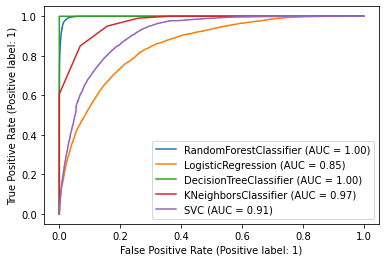

In [34]:
from sklearn.metrics import plot_roc_curve

# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

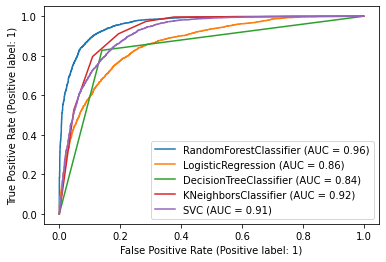

In [35]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**Best model as per ROC AUC Curve:** - **Random Forest Classifier** as the difference between training and test accuracy is minimum and also more area is covered under Random Forest curve

**Saving the model for income determine whether a person makes over $50K a year prediction**

In [36]:
filename = 'census_income_clf.pkl'
pickle.dump(rf,open(filename,'wb'))

**CONCLUSION**

In [37]:
loaded_model = pickle.load(open('census_income_clf.pkl','rb'))

pred_rf = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_rf)

print(result*100)

89.39354838709677


In [38]:
conclusion = pd.DataFrame([pred_rf,y_test],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,7740,7741,7742,7743,7744,7745,7746,7747,7748,7749
Predicted,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
